In [111]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [112]:
dataset = load_wine()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f"x_train shape: {x_train.shape} x_test shape: {x_test.shape}")

colors = ["blue", "green", "yellow"]

x_train shape: (124, 13) x_test shape: (54, 13)


In [113]:
def plot_kneighbors(title: str, x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray, y_pred: np.ndarray):
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    for idx, point in enumerate(x_train):
        plt.scatter(x=point[0], y=point[1], color=colors[y_train[idx]])
    for idx, point in enumerate(x_test):
        pred, actual = y_pred[idx], y_test[idx]
        if pred != actual:
            plt.scatter(x=point[0], y=point[1], color="red", marker="*")
        else:
            plt.scatter(x=point[0], y=point[1], color="red")
    plt.show()

#### Without Normalization

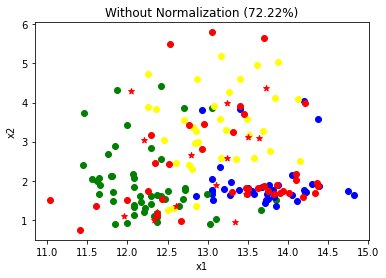

In [114]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)

plot_kneighbors(f"Without Normalization ({score*100:.4}%)", x_train, y_train, x_test, y_test, y_pred)

#### With Normalization (StandardScaler)

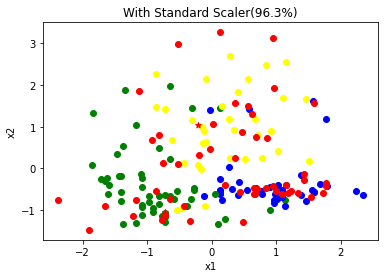

In [115]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
score = clf.score(x_test_transformed, y_test)

plot_kneighbors(f"With Standard Scaler({score*100:.4}%)", x_train_transformed, y_train, x_test_transformed, y_test, y_pred)

#### With Normalization (MinMax Scaler)

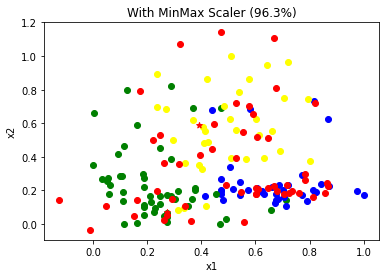

In [116]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
score = clf.score(x_test_transformed, y_test)

plot_kneighbors(f"With MinMax Scaler ({score*100:.4}%)", x_train_transformed, y_train, x_test_transformed, y_test, y_pred)